In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('censusdata.csv')
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [3]:
#this is a classification problem
#there's a huge dimension of sub categories so(curse of dimensionality) 
#we are supposed to use pca in the later stage to reduce it

In [4]:
df.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
income            object
dtype: object

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [6]:
#dtypes: int64(6), object(9)

In [7]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [8]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [9]:
#outliers may be preesent in age,capitalgain,capital loss,hoursperweek

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,32561.0,38.581647,13.640433,17.0,28.0,37.0,48.0,90.0
fnlwgt,32561.0,189778.366512,105549.977697,12285.0,117827.0,178356.0,237051.0,1484705.0
education-num,32561.0,10.080679,2.572720,1.0,9.0,10.0,12.0,16.0
capital-gain,32561.0,1077.648844,7385.292085,0.0,0.0,0.0,0.0,99999.0
capital-loss,32561.0,87.303830,402.960219,0.0,0.0,0.0,0.0,4356.0
hours-per-week,32561.0,40.437456,12.347429,1.0,40.0,40.0,45.0,99.0


In [11]:
df.describe(include=["O"])

,workclass,education,marital-status,occupation,relationship,race,sex,native-country,income
count,32561,32561,32561,32561,32561,32561,32561,32561,32561
unique,9,16,7,15,6,5,2,42,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,22696,10501,14976,4140,13193,27816,21790,29170,24720


In [12]:
df['native-country'].unique()

array([' United-States', ' Cuba', ' Jamaica', ' India', ' ?', ' Mexico',
       ' South', ' Puerto-Rico', ' Honduras', ' England', ' Canada',
       ' Germany', ' Iran', ' Philippines', ' Italy', ' Poland',
       ' Columbia', ' Cambodia', ' Thailand', ' Ecuador', ' Laos',
       ' Taiwan', ' Haiti', ' Portugal', ' Dominican-Republic',
       ' El-Salvador', ' France', ' Guatemala', ' China', ' Japan',
       ' Yugoslavia', ' Peru', ' Outlying-US(Guam-USVI-etc)', ' Scotland',
       ' Trinadad&Tobago', ' Greece', ' Nicaragua', ' Vietnam', ' Hong',
       ' Ireland', ' Hungary', ' Holand-Netherlands'], dtype=object)

In [13]:
#ohh so there are missing data in the form of question(' ?')

In [14]:
df = df.replace(' ?', np.nan)

In [15]:
df.isnull().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
income               0
dtype: int64

In [16]:
df.isnull().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
income               0
dtype: int64

In [17]:
#there are 3 columns containing missing values i.e., 'workclass', 'occupation', 'native.country'


In [18]:
#Filling in the data

In [19]:
df['native-country'].value_counts()

 United-States                 29170
 Mexico                          643
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 Greece                           29
 

In [20]:
#categorical fillings so mostly mode or median are supposed to be used as fillna method
#!i think it will mostly be filled with United-States

In [21]:
df['workclass'].unique()

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', nan, ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

In [22]:
df['workclass'].value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64

In [23]:
#categorical fillings so mostly mode or median are supposed to be used as fillna method
#!i think it will mostly be filled with Private

In [24]:
df['occupation'].unique()

array([' Adm-clerical', ' Exec-managerial', ' Handlers-cleaners',
       ' Prof-specialty', ' Other-service', ' Sales', ' Craft-repair',
       ' Transport-moving', ' Farming-fishing', ' Machine-op-inspct',
       ' Tech-support', nan, ' Protective-serv', ' Armed-Forces',
       ' Priv-house-serv'], dtype=object)

In [25]:
df['occupation'].value_counts()

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3770
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: occupation, dtype: int64

In [26]:
#categorical fillings so mostly mode are supposed to be used as fillna method


In [27]:
print(df['workclass'].mode()[0])
print(df['occupation'].mode()[0])
print(df['native-country'].mode()[0])

 Private
 Prof-specialty
 United-States


In [28]:
# filling values now
df['workclass'].fillna(df['workclass'].mode()[0], inplace=True)
df['occupation'].fillna(df['occupation'].mode()[0], inplace=True)
df['native-country'].fillna(df['native-country'].mode()[0], inplace=True)

In [29]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

so now data filling is over 

In [30]:
df['income'].value_counts()

 <=50K    24720
 >50K      7841
Name: income, dtype: int64

In [31]:
#this data is little imbalanced  but i think it is adjustable

In [32]:
df.corr()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
age,1.000000,-0.076646,0.036527,0.077674,0.057775,0.068756
fnlwgt,-0.076646,1.000000,-0.043195,0.000432,-0.010252,-0.018768
education-num,0.036527,-0.043195,1.000000,0.122630,0.079923,0.148123
capital-gain,0.077674,0.000432,0.122630,1.000000,-0.031615,0.078409
capital-loss,0.057775,-0.010252,0.079923,-0.031615,1.000000,0.054256
hours-per-week,0.068756,-0.018768,0.148123,0.078409,0.054256,1.000000


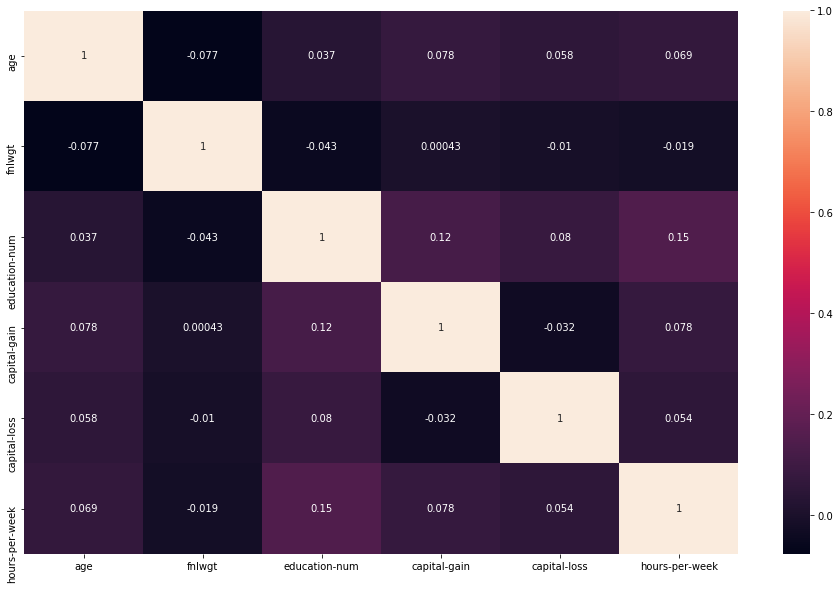

In [33]:
plt.figure(figsize=(16,10))
sns.heatmap(df.corr(),annot=True)

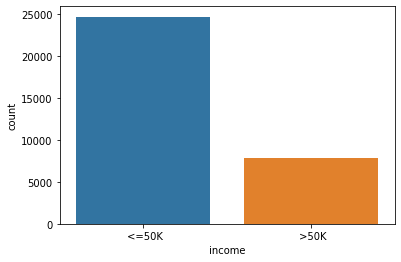

In [34]:
sns.countplot(df['income'],label="Count")

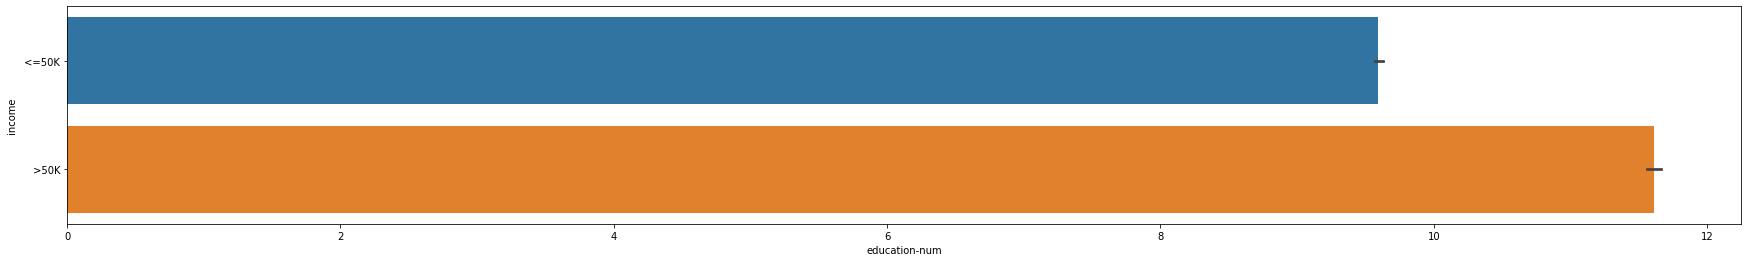

In [35]:
plt.figure(figsize=(30,4))
sns.barplot(x = 'education-num', y = 'income', data =df)

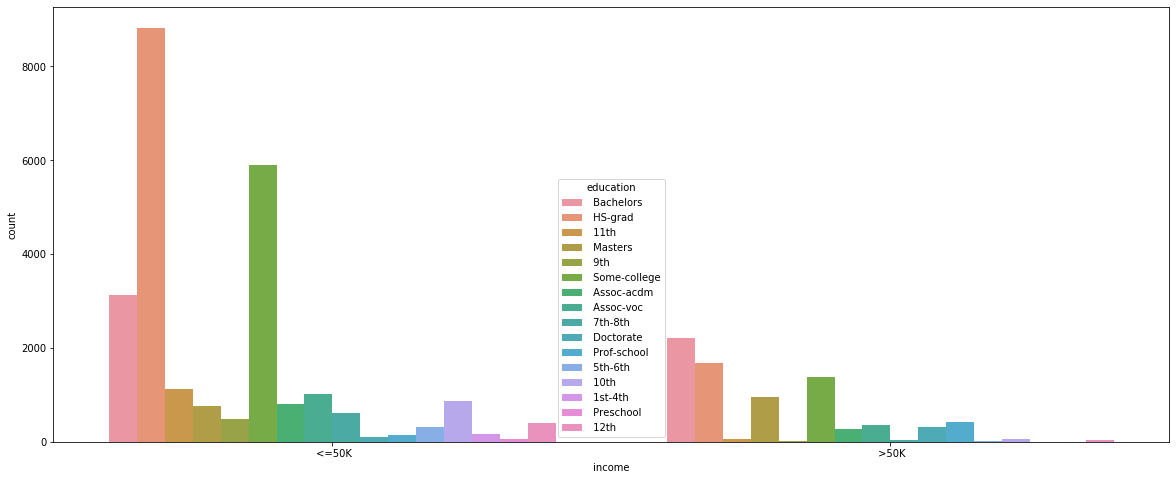

In [36]:
plt.figure(figsize=(20,8))
sns.countplot(x = 'income', hue="education", data =df)

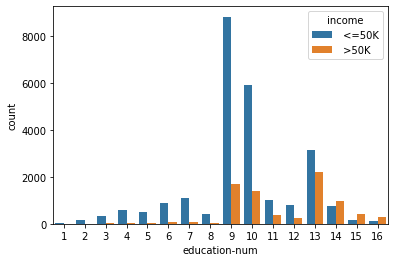

In [37]:
sns.countplot(x = 'education-num',  hue="income", data =df)

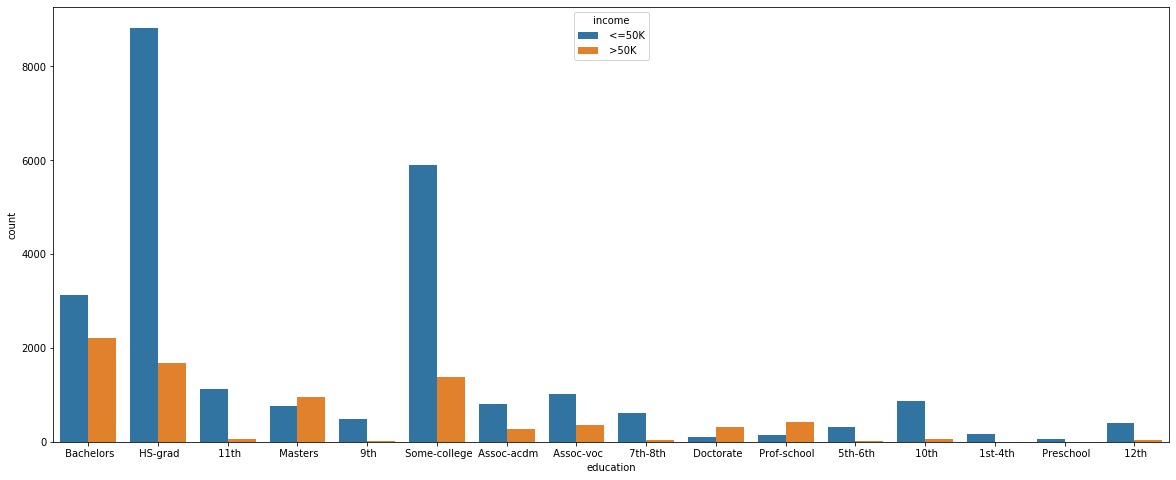

In [38]:
plt.figure(figsize=(20,8))
sns.countplot(x = 'education',  hue="income", data =df)

In [39]:
#bachelors have higher probabilty of earning  income >50K
#most people having income are HS-grad
#and HS-grad people have higher probability of getting income<50k

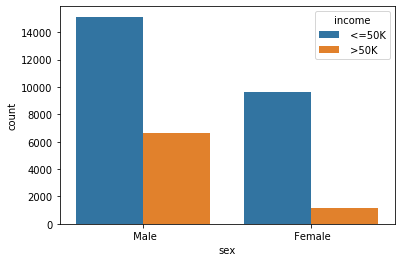

In [40]:
sns.countplot(x="sex",hue="income",data=df)

In [41]:
 #females earning > 50K is less as compared to males
    #so basically theres a paygap between male and female

In [42]:
#"Income >50K Probability"

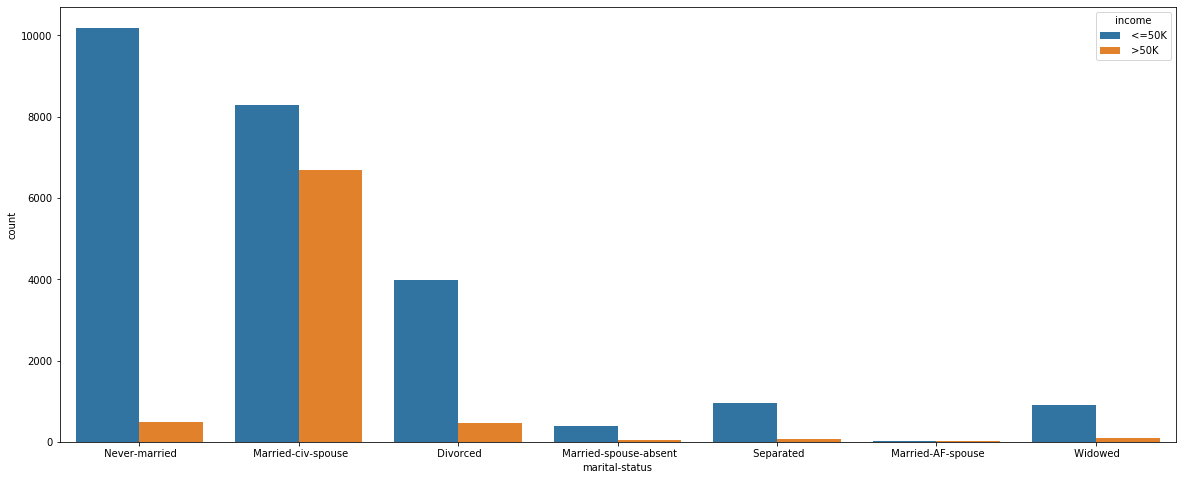

In [43]:
plt.figure(figsize=(20,8))
sns.countplot(x="marital-status",hue="income",data=df)

In [44]:
#married-civ-spouse has Income >50K Probability higher

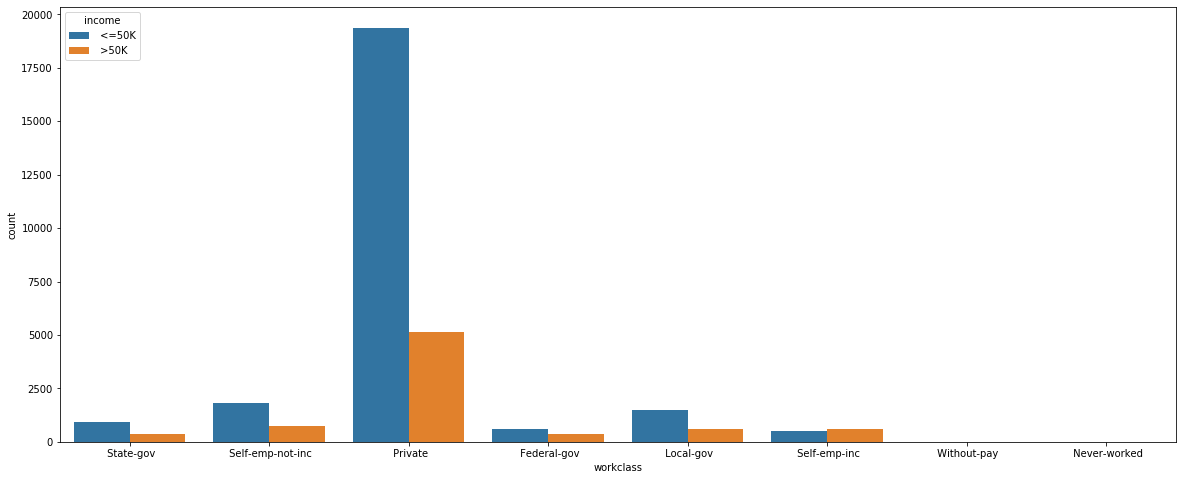

In [45]:
plt.figure(figsize=(20,8))
sns.countplot(x="workclass",hue="income",data=df)

In [46]:
#Most of the employess are employed in Private sector and looks like people who are in private sector
#are more likely to earn >50K a year

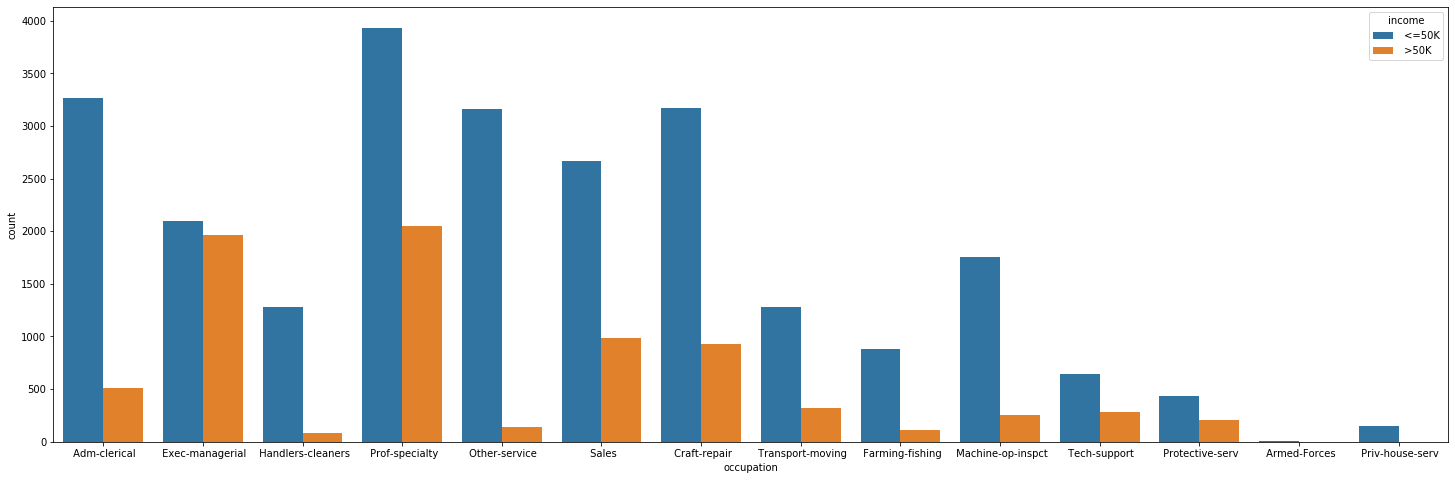

In [47]:
plt.figure(figsize=(25,8))
sns.countplot(x="occupation",hue="income",data=df)

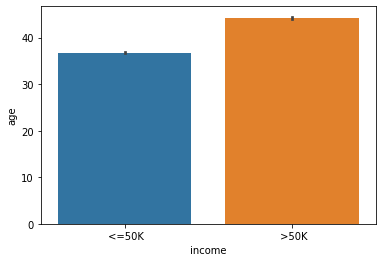

In [48]:
sns.barplot(x = 'income', y = 'age', data =df)

In [49]:
#As age increases, proportion of people earning more than 50K increases

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40]),
 <a list of 41 Text xticklabel objects>)

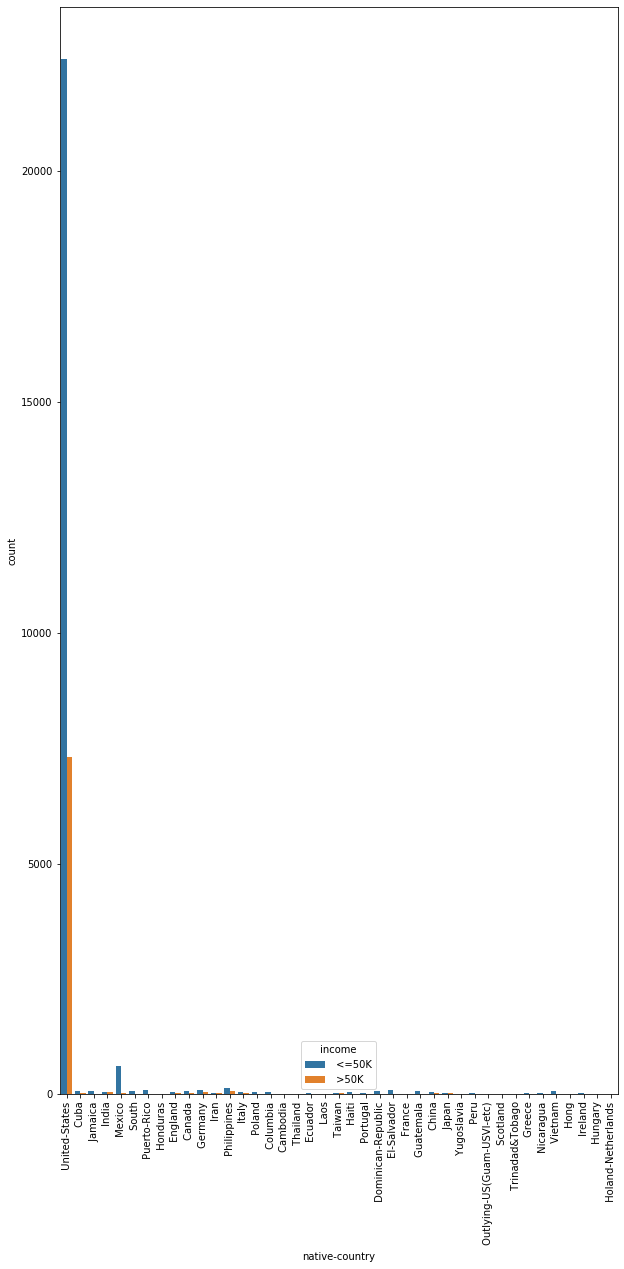

In [50]:
plt.figure(figsize=(10,20))
sns.countplot(x='native-country', hue= 'income',data= df)


sns.color_palette("rocket")
plt.xticks(rotation=90)

In [51]:
#every thing is in US

In [52]:
df.groupby('income').count()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
income,,,,,,,,,,,,,,
<=50K,24720,24720,24720,24720,24720,24720,24720,24720,24720,24720,24720,24720,24720,24720
>50K,7841,7841,7841,7841,7841,7841,7841,7841,7841,7841,7841,7841,7841,7841


In [53]:
df.skew()

age                0.558743
fnlwgt             1.446980
education-num     -0.311676
capital-gain      11.953848
capital-loss       4.594629
hours-per-week     0.227643
dtype: float64

In [54]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [55]:
from sklearn import preprocessing 
label_encoder = preprocessing.LabelEncoder() 
df['workclass']= label_encoder.fit_transform(df['workclass']) 
df['education']= label_encoder.fit_transform(df['education'])
df['marital-status']= label_encoder.fit_transform(df['marital-status'])
df['occupation']= label_encoder.fit_transform(df['occupation'])
df['relationship']= label_encoder.fit_transform(df['relationship'])
df['race']= label_encoder.fit_transform(df['race'])
df['native-country']= label_encoder.fit_transform(df['native-country'])
df['sex']= label_encoder.fit_transform(df['sex'])
df['income']= label_encoder.fit_transform(df['income'])

In [56]:
 df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,6,77516,9,13,4,0,1,4,1,2174,0,40,38,0
1,50,5,83311,9,13,2,3,0,4,1,0,0,13,38,0
2,38,3,215646,11,9,0,5,1,4,1,0,0,40,38,0
3,53,3,234721,1,7,2,5,0,2,1,0,0,40,38,0
4,28,3,338409,9,13,2,9,5,2,0,0,0,40,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,3,257302,7,12,2,12,5,4,0,0,0,38,38,0
32557,40,3,154374,11,9,2,6,0,4,1,0,0,40,38,1
32558,58,3,151910,11,9,6,0,4,4,0,0,0,40,38,0
32559,22,3,201490,11,9,4,0,3,4,1,0,0,20,38,0


In [57]:
df.corr()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
age,1.000000,0.040504,-0.076646,-0.010508,0.036527,-0.266288,0.001739,-0.263698,0.028718,0.088832,0.077674,0.057775,0.068756,-0.000270,0.234037
workclass,0.040504,1.000000,-0.024338,0.004874,0.003536,-0.020468,0.007110,-0.057947,0.048350,0.071584,0.031505,0.002644,0.042199,-0.001625,0.002693
fnlwgt,-0.076646,-0.024338,1.000000,-0.028145,-0.043195,0.028153,0.000188,0.008931,-0.021291,0.026858,0.000432,-0.010252,-0.018768,-0.063286,-0.009463
education,-0.010508,0.004874,-0.028145,1.000000,0.359153,-0.038407,-0.041279,-0.010876,0.014131,-0.027356,0.030046,0.016746,0.055510,0.076060,0.079317
education-num,0.036527,0.003536,-0.043195,0.359153,1.000000,-0.069304,0.070954,-0.094153,0.031838,0.012280,0.122630,0.079923,0.148123,0.088894,0.335154
marital-status,-0.266288,-0.020468,0.028153,-0.038407,-0.069304,1.000000,0.034962,0.185451,-0.068013,-0.129314,-0.043393,-0.034187,-0.190519,-0.021278,-0.199307
occupation,0.001739,0.007110,0.000188,-0.041279,0.070954,0.034962,1.000000,-0.037451,-0.004839,0.047461,0.018021,0.009680,-0.012879,-0.002217,0.034625
relationship,-0.263698,-0.057947,0.008931,-0.010876,-0.094153,0.185451,-0.037451,1.000000,-0.116055,-0.582454,-0.057919,-0.061062,-0.248974,-0.010712,-0.250918
race,0.028718,0.048350,-0.021291,0.014131,0.031838,-0.068013,-0.004839,-0.116055,1.000000,0.087204,0.011145,0.018899,0.041910,0.116529,0.071846
sex,0.088832,0.071584,0.026858,-0.027356,0.012280,-0.129314,0.047461,-0.582454,0.087204,1.000000,0.048480,0.045567,0.229309,0.002061,0.215980


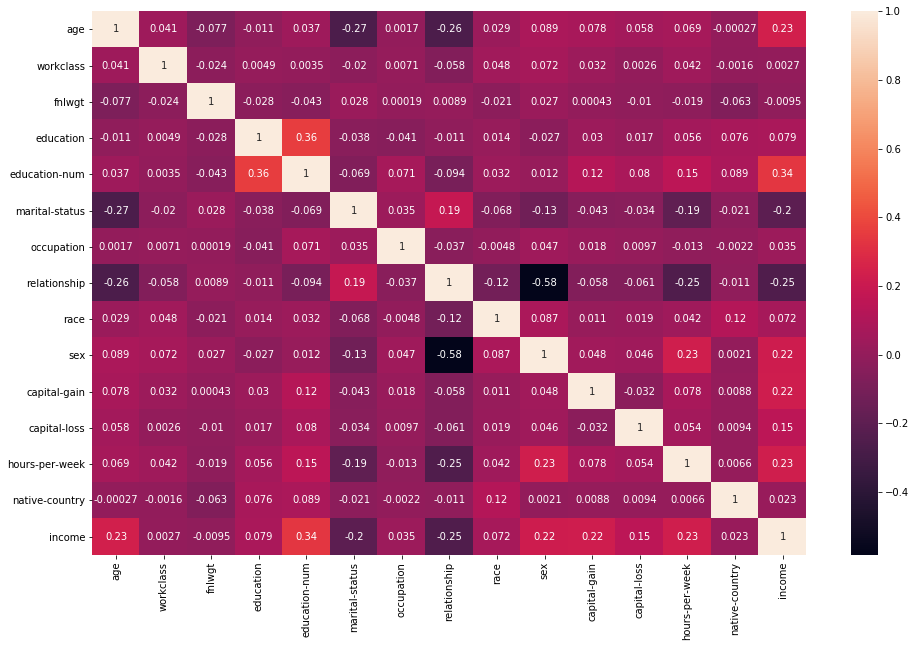

In [58]:
plt.figure(figsize=(16,10))
sns.heatmap(df.corr(),annot=True)

In [59]:
#lets drop useless column
df.drop(columns=["fnlwgt"],inplace=True)
df.drop(columns=["workclass"],inplace=True)

In [60]:
df.skew()

age                0.558743
education         -0.934042
education-num     -0.311676
marital-status    -0.013508
occupation         0.000565
relationship       0.786818
race              -2.435386
sex               -0.719293
capital-gain      11.953848
capital-loss       4.594629
hours-per-week     0.227643
native-country    -4.243158
income             1.212430
dtype: float64

In [61]:
#Lets treat the skewness
import numpy as np
for index in df.skew().index:
    if df.skew().loc[index]>0.5:
        df[index]=np.cbrt(df[index])
    if df.skew().loc[index]<-0.5:
        df[index]=np.cbrt(df[index])

In [62]:
df.skew()

age               0.090553
education        -2.817731
education-num    -0.311676
marital-status   -0.013508
occupation        0.000565
relationship     -0.102483
race             -4.746062
sex              -0.719293
capital-gain      4.099578
capital-loss      4.337076
hours-per-week    0.227643
native-country   -5.491170
income            1.212430
dtype: float64

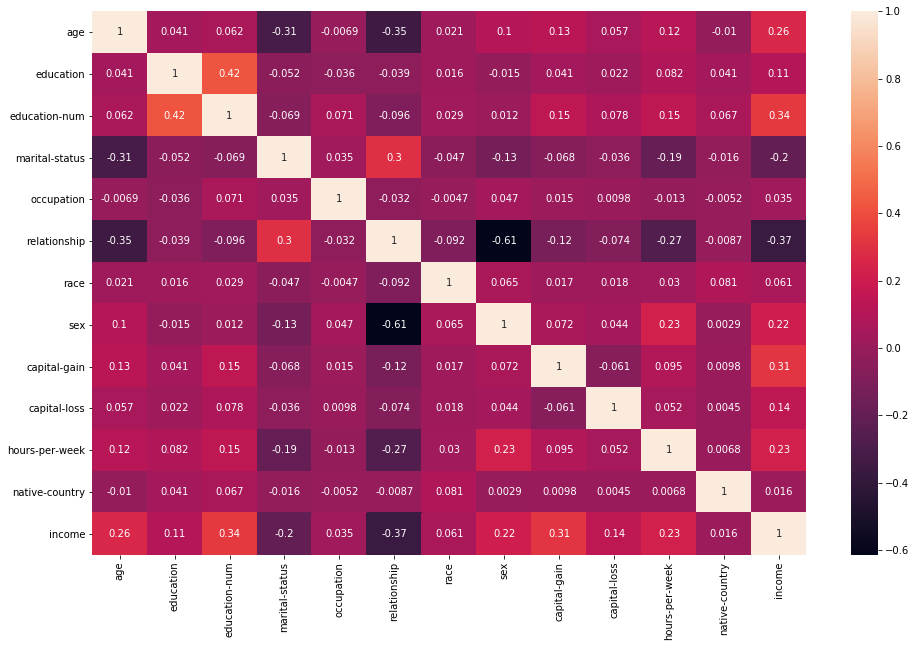

In [63]:
plt.figure(figsize=(16,10))
sns.heatmap(df.corr(),annot=True)

In [64]:
#lets drop native-country too
#as it only focuses on US
#df.drop(columns=["native-country"],inplace=True)

In [65]:
from scipy.stats import zscore
z_score=abs(zscore(df))
print(df.shape)
dfnew=df.loc[(z_score<3).all(axis=1)]
print(dfnew.shape)

(32561, 13)
(27332, 13)


# Machine learning

In [66]:
x=df.drop(columns=["income"])

In [67]:
y=dfnew['income']

In [68]:
df_x=dfnew.drop(columns=["income"])

In [69]:
df_x=pd.get_dummies(df_x,drop_first=True)

In [70]:
df_x

,age,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,3.391211,2.080084,13,4,0,1.000000,1.587401,1.0,12.954476,0.0,40,3.361975
1,3.684031,2.080084,13,2,3,0.000000,1.587401,1.0,0.000000,0.0,13,3.361975
2,3.361975,2.223980,9,0,5,1.000000,1.587401,1.0,0.000000,0.0,40,3.361975
3,3.756286,1.000000,7,2,5,0.000000,1.259921,1.0,0.000000,0.0,40,3.361975
5,3.332222,2.289428,14,2,3,1.709976,1.587401,0.0,0.000000,0.0,40,3.361975
...,...,...,...,...,...,...,...,...,...,...,...,...
32555,2.802039,2.466212,10,4,10,1.000000,1.587401,1.0,0.000000,0.0,40,3.361975
32556,3.000000,1.912931,12,2,12,1.709976,1.587401,0.0,0.000000,0.0,38,3.361975
32557,3.419952,2.223980,9,2,6,0.000000,1.587401,1.0,0.000000,0.0,40,3.361975
32558,3.870877,2.223980,9,6,0,1.587401,1.587401,0.0,0.000000,0.0,40,3.361975


In [71]:
x

,age,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,3.391211,2.080084,13,4,0,1.000000,1.587401,1.0,12.954476,0.0,40,3.361975
1,3.684031,2.080084,13,2,3,0.000000,1.587401,1.0,0.000000,0.0,13,3.361975
2,3.361975,2.223980,9,0,5,1.000000,1.587401,1.0,0.000000,0.0,40,3.361975
3,3.756286,1.000000,7,2,5,0.000000,1.259921,1.0,0.000000,0.0,40,3.361975
4,3.036589,2.080084,13,2,9,1.709976,1.259921,0.0,0.000000,0.0,40,1.587401
...,...,...,...,...,...,...,...,...,...,...,...,...
32556,3.000000,1.912931,12,2,12,1.709976,1.587401,0.0,0.000000,0.0,38,3.361975
32557,3.419952,2.223980,9,2,6,0.000000,1.587401,1.0,0.000000,0.0,40,3.361975
32558,3.870877,2.223980,9,6,0,1.587401,1.587401,0.0,0.000000,0.0,40,3.361975
32559,2.802039,2.223980,9,4,0,1.442250,1.587401,1.0,0.000000,0.0,20,3.361975


In [72]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
le.fit(y)
y=le.transform(y)
y

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [73]:
y

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [74]:
y.shape

(27332,)

In [75]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit(df_x)
newx=sc.transform(df_x)
newx=pd.DataFrame(newx,columns=df_x.columns)

In [76]:
df_x=np.array(df_x)


In [77]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(newx,y,test_size=0.30,random_state=42)

In [78]:
import sklearn
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import warnings
warnings.filterwarnings('ignore')


model=[LogisticRegression(), GaussianNB(),SVC(),DecisionTreeClassifier(),KNeighborsClassifier(),RandomForestClassifier()]

for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    predm=m.predict(x_test)
    print('Accuracy score of',m,'is:')
    print(accuracy_score(y_test,predm))
    print(confusion_matrix(y_test,predm))
    print(classification_report(y_test,predm))
    print('\n')

Accuracy score of LogisticRegression() is:
0.8321951219512195
[[6178  352]
 [1024  646]]
              precision    recall  f1-score   support

           0       0.86      0.95      0.90      6530
           1       0.65      0.39      0.48      1670

    accuracy                           0.83      8200
   macro avg       0.75      0.67      0.69      8200
weighted avg       0.81      0.83      0.82      8200



Accuracy score of GaussianNB() is:
0.3174390243902439
[[ 952 5578]
 [  19 1651]]
              precision    recall  f1-score   support

           0       0.98      0.15      0.25      6530
           1       0.23      0.99      0.37      1670

    accuracy                           0.32      8200
   macro avg       0.60      0.57      0.31      8200
weighted avg       0.83      0.32      0.28      8200



Accuracy score of SVC() is:
0.84
[[6189  341]
 [ 971  699]]
              precision    recall  f1-score   support

           0       0.86      0.95      0.90      6530
   

In [79]:
from sklearn.model_selection import cross_val_score
print(cross_val_score( SVC(),newx,y,cv=5,scoring="accuracy").mean())

0.8399679318635427


In [ ]:
#let choose svc as final model

In [81]:
x1_train, x1_test, y1_train, y1_test = train_test_split(newx, y,random_state = 70,test_size=0.20,stratify=y)
svc= SVC()
svc.fit(x1_train,y1_train)
y1_pred=svc.predict(x1_test)

In [82]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
print("Confusion matrix \n",confusion_matrix(y1_test,y1_pred))
print("f1 score is : ",f1_score(y1_test,y1_pred,average='micro'))
print("classification report \n",classification_report(y1_test,y1_pred))
print("Accuracy score: ",accuracy_score(y1_test,y1_pred))

Confusion matrix 
 [[4130  215]
 [ 650  472]]
f1 score is :  0.8417779403694896
classification report 
               precision    recall  f1-score   support

           0       0.86      0.95      0.91      4345
           1       0.69      0.42      0.52      1122

    accuracy                           0.84      5467
   macro avg       0.78      0.69      0.71      5467
weighted avg       0.83      0.84      0.83      5467

Accuracy score:  0.8417779403694897


In [86]:
import joblib
joblib.dump(svc,'censusincome.obj')

['censusincome.obj']